# Analysis of Aspiring Mind Employment Outcome 2015 (AMEO) dataset

## Introduction

### Dataset Description

The Aspiring Mind Employment Outcome 2015 (AMEO) dataset, released by Aspiring Minds, focuses on employment outcomes for engineering graduates. It includes dependent variables such as Salary, Job Titles, and Job Locations, along with standardized scores in cognitive skills, technical skills, and personality skills. With around 40 independent variables and 4000 data points, these variables encompass both continuous and categorical data. The dataset also includes demographic features and unique identifiers for each candidate.

### Objective

The goal of this Exploratory Data Analysis (EDA) is to extensively investigate the provided dataset, with a particular emphasis on understanding the link between various variables and the target variable, Salary.

The key aims of this analysis include:

- Providing a detailed explanation of the dataset's features.
- Find any observable patterns or trends in the data.
- Investigating the relationships between the independent factors and the target variable (salary).
- Identify any outliers or abnormalities in the dataset.
- Offering practical insights and recommendations based on the analysis.


## Importing the data and dislaying the head, shape, descriptions, etc.

In [2]:
import pandas as pd
import numpy as np

In [3]:
ameo_data = pd.read_csv('amcat.csv')
df1 = ameo_data.copy()
df1.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,06-01-2012 00:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,09-01-2013 00:00,present,assistant manager,Indore,m,10-04-1989 00:00,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,06-01-2014 00:00,present,systems engineer,Chennai,f,08-03-1992 00:00,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,07-01-2011 00:00,present,senior software engineer,Gurgaon,m,12-05-1989 00:00,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,03-01-2014 00:00,03-01-2015 00:00,get,Manesar,m,2/27/91 0:00,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   object 
 1   ID                     3998 non-null   int64  
 2   Salary                 3998 non-null   int64  
 3   DOJ                    3998 non-null   object 
 4   DOL                    3998 non-null   object 
 5   Designation            3998 non-null   object 
 6   JobCity                3998 non-null   object 
 7   Gender                 3998 non-null   object 
 8   DOB                    3998 non-null   object 
 9   10percentage           3998 non-null   float64
 10  10board                3998 non-null   object 
 11  12graduation           3998 non-null   int64  
 12  12percentage           3998 non-null   float64
 13  12board                3998 non-null   object 
 14  CollegeID              3998 non-null   int64  
 15  Coll

In [5]:
df1.shape

(3998, 39)

In [6]:
df1.isnull().sum()

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

In [7]:
df1.duplicated().sum()

0

In [8]:
df1.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [9]:
df1.nunique()

Unnamed: 0                  1
ID                       3998
Salary                    177
DOJ                        81
DOL                        67
Designation               419
JobCity                   339
Gender                      2
DOB                      1872
10percentage              851
10board                   275
12graduation               16
12percentage              801
12board                   340
CollegeID                1350
CollegeTier                 2
Degree                      4
Specialization             46
collegeGPA               1282
CollegeCityID            1350
CollegeCityTier             2
CollegeState               26
GraduationYear             11
English                   111
Logical                   107
Quant                     138
Domain                    243
ComputerProgramming        79
ElectronicsAndSemicon      29
ComputerScience            20
MechanicalEngg             42
ElectricalEngg             31
TelecomEngg                26
CivilEngg 

In [10]:
df1 = df1.drop(columns = ['Unnamed: 0', 'ID','CollegeID','CollegeCityID'])
df1.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,06-01-2012 00:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,"board ofsecondary education,ap",2007,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,09-01-2013 00:00,present,assistant manager,Indore,m,10-04-1989 00:00,85.4,cbse,2007,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,06-01-2014 00:00,present,systems engineer,Chennai,f,08-03-1992 00:00,85.0,cbse,2010,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,07-01-2011 00:00,present,senior software engineer,Gurgaon,m,12-05-1989 00:00,85.6,cbse,2007,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,03-01-2014 00:00,03-01-2015 00:00,get,Manesar,m,2/27/91 0:00,78.0,cbse,2008,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


### Datatypes Conversion

#### 1. DOL - Date of Leaving.
The survey was conducted back in 2015 and therefore making an assumption that the respondents who responded as **present** for DOL actually left the company within 2015 only. So, we will replace **present** value in DOL with 2024-02-17.

Then we convert the datetype of `DOJ` and `DOL` to datetime.

In [12]:
df1['DOL'].replace('present','2015-12-31', inplace = True)
df1['DOL'] = pd.to_datetime(df1['DOL'], errors='coerce')
df1['DOJ'] = pd.to_datetime(df1['DOJ'], errors='coerce')
df1.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,2015-12-31,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,"board ofsecondary education,ap",2007,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,2015-12-31,assistant manager,Indore,m,10-04-1989 00:00,85.4,cbse,2007,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,2015-12-31,systems engineer,Chennai,f,08-03-1992 00:00,85.0,cbse,2010,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011-07-01,2015-12-31,senior software engineer,Gurgaon,m,12-05-1989 00:00,85.6,cbse,2007,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014-03-01,NaT,get,Manesar,m,2/27/91 0:00,78.0,cbse,2008,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [13]:
categorical = ['Designation','JobCity', 'Gender','10board','12board','CollegeTier','Degree',
              'Specialization','CollegeCityTier','CollegeState']
for cat in categorical:
    df1[cat] = df1[cat].astype('category')

In [14]:
df1.dtypes

Salary                            int64
DOJ                      datetime64[ns]
DOL                      datetime64[ns]
Designation                    category
JobCity                        category
Gender                         category
DOB                              object
10percentage                    float64
10board                        category
12graduation                      int64
12percentage                    float64
12board                        category
CollegeTier                    category
Degree                         category
Specialization                 category
collegeGPA                      float64
CollegeCityTier                category
CollegeState                   category
GraduationYear                    int64
English                           int64
Logical                           int64
Quant                             int64
Domain                          float64
ComputerProgramming               int64
ElectronicsAndSemicon             int64


#### 2. Checking if the `DOL (Date of leaving)` is actually greater than `DOJ (Date of joining)`.

In [15]:
dates = df1[(df1['DOL'] < df1['DOJ'])].shape[0]
print(f'DOL is earlier than DOJ for {dates} observations.')
print(df1.shape)

DOL is earlier than DOJ for 0 observations.
(3998, 35)


These observations might be typos and hence we will drop those 40 rows.

In [16]:
df1 = df1.drop(df1[~(df1['DOL'] > df1['DOJ'])].index)
print(df1.shape)

(1875, 35)


#### 3. Making the entries for `Gender` column more descriptive

In [17]:
df1['Gender'].replace({'f':'Female','m':'Male'}, inplace = True)
df1.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,2015-12-31,senior quality engineer,Bangalore,Female,2/19/90 0:00,84.30,"board ofsecondary education,ap",2007,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.3549,-0.4455
1,500000,2013-09-01,2015-12-31,assistant manager,Indore,Male,10-04-1989 00:00,85.40,cbse,2007,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.1076,0.8637
2,325000,2014-06-01,2015-12-31,systems engineer,Chennai,Female,08-03-1992 00:00,85.00,cbse,2010,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.8682,0.6721
3,1100000,2011-07-01,2015-12-31,senior software engineer,Gurgaon,Male,12-05-1989 00:00,85.60,cbse,2007,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.4078,-0.9194
5,300000,2014-06-01,2015-12-31,system engineer,Hyderabad,Male,07-02-1992 00:00,89.92,state board,2010,...,407,-1,-1,-1,-1,-0.3027,-0.6201,-2.2954,-0.7415,-0.8608


#### 4. Validating if the results are in percentages and not in CGPA or otherwise.

In [18]:
print((df1['10percentage'] <=10).sum())
print((df1['12percentage'] <=10).sum())
print((df1['collegeGPA'] <=10).sum())

0
0
1


`10percentage` and `12percentage` are fine but `collegeGPA` has 12 obvservations which need to be deal with.

In [19]:
df1.loc[df1['collegeGPA']<=10,'collegeGPA'].index

Index([1439], dtype='int64')

In [20]:
df1.loc[df1['collegeGPA']<=10,'collegeGPA'] = (df1.loc[df1['collegeGPA']<=10,'collegeGPA']/10)*100
df1.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,2015-12-31,senior quality engineer,Bangalore,Female,2/19/90 0:00,84.30,"board ofsecondary education,ap",2007,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.3549,-0.4455
1,500000,2013-09-01,2015-12-31,assistant manager,Indore,Male,10-04-1989 00:00,85.40,cbse,2007,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.1076,0.8637
2,325000,2014-06-01,2015-12-31,systems engineer,Chennai,Female,08-03-1992 00:00,85.00,cbse,2010,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.8682,0.6721
3,1100000,2011-07-01,2015-12-31,senior software engineer,Gurgaon,Male,12-05-1989 00:00,85.60,cbse,2007,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.4078,-0.9194
5,300000,2014-06-01,2015-12-31,system engineer,Hyderabad,Male,07-02-1992 00:00,89.92,state board,2010,...,407,-1,-1,-1,-1,-0.3027,-0.6201,-2.2954,-0.7415,-0.8608


#### 5. Validating if there exist 0 or -1 in the data

In [21]:
print((df1==0).sum()[(df1==0).sum() > 0])

CollegeCityTier    1308
dtype: int64


In [22]:
(df1==-1).sum()[(df1==-1).sum()>0]/len(df1)*100

Domain                    5.813333
ComputerProgramming      22.560000
ElectronicsAndSemicon    71.413333
ComputerScience          75.626667
MechanicalEngg           94.293333
ElectricalEngg           96.106667
TelecomEngg              89.973333
CivilEngg                98.826667
dtype: float64

According to the description of the columns:

1. 10board
2. 12board
3. GraduationYear
4. JobCity
5. Domain

**The above columns cannot have 0 or -1 as their inputs and hence they should be considered as null values and therefore imputed**

The following columns describes subjects which are optional for the exam and that is why they have large number of -1(null values). Hence we will be dropping the columns out of analysis in which the percentage for -1 values is greater than or equal to 80% and for the rest of them, we will impute the values as zero.

| Sr.No. | Column Name              | Null Score      |
|------|---------------------|------------|
| 1    | ElectronicsAndSemicon | 71.392341 |
| 2    | ComputerScience       | 77.605884 |
| 3    | MechanicalEngg        | 94.040071 |
| 4    | ElectricalEngg        | 96.094344 |
| 5    | TelecomEngg           | 90.565559 |
| 6    | CivilEngg             | 98.934821 |          

In [23]:
df1 = df1.drop(columns = ['MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg'])
df1.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,2015-12-31,senior quality engineer,Bangalore,Female,2/19/90 0:00,84.30,"board ofsecondary education,ap",2007,...,525,0.635979,445,-1,-1,0.9737,0.8128,0.5269,1.3549,-0.4455
1,500000,2013-09-01,2015-12-31,assistant manager,Indore,Male,10-04-1989 00:00,85.40,cbse,2007,...,780,0.960603,-1,466,-1,-0.7335,0.3789,1.2396,-0.1076,0.8637
2,325000,2014-06-01,2015-12-31,systems engineer,Chennai,Female,08-03-1992 00:00,85.00,cbse,2010,...,370,0.450877,395,-1,-1,0.2718,1.7109,0.1637,-0.8682,0.6721
3,1100000,2011-07-01,2015-12-31,senior software engineer,Gurgaon,Male,12-05-1989 00:00,85.60,cbse,2007,...,625,0.974396,615,-1,-1,0.0464,0.3448,-0.3440,-0.4078,-0.9194
5,300000,2014-06-01,2015-12-31,system engineer,Hyderabad,Male,07-02-1992 00:00,89.92,state board,2010,...,620,-1.000000,645,-1,407,-0.3027,-0.6201,-2.2954,-0.7415,-0.8608


In [24]:
df1['10board'] = df1['10board'].astype(str)
df1['12board'] = df1['12board'].astype(str)
df1['JobCity'] = df1['JobCity'].astype(str)

In [25]:
df1['10board'] = df1['10board'].replace({'0':np.nan})
df1['12board'] = df1['12board'].replace({'0':np.nan})
df1['GraduationYear'] = df1['GraduationYear'].replace({0:np.nan})
df1['JobCity'] = df1['JobCity'].replace({'-1':np.nan})
df1['Domain'] = df1['Domain'].replace({-1:np.nan})
df1['ElectronicsAndSemicon'] = df1['ElectronicsAndSemicon'].replace({-1:0})
df1['ComputerScience'] = df1['ComputerScience'].replace({-1:0})
df1['ComputerProgramming'] = df1['ComputerProgramming'].replace({-1:np.nan})

In [26]:
df1['10board'] = df1['10board'].astype('category')
df1['12board'] = df1['12board'].astype('category')
df1['JobCity'] = df1['JobCity'].astype('category')

In [27]:
df1

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,2015-12-31,senior quality engineer,Bangalore,Female,2/19/90 0:00,84.30,"board ofsecondary education,ap",2007,...,525,0.635979,445.0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,2015-12-31,assistant manager,Indore,Male,10-04-1989 00:00,85.40,cbse,2007,...,780,0.960603,NaN,466,0,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,2015-12-31,systems engineer,Chennai,Female,08-03-1992 00:00,85.00,cbse,2010,...,370,0.450877,395.0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011-07-01,2015-12-31,senior software engineer,Gurgaon,Male,12-05-1989 00:00,85.60,cbse,2007,...,625,0.974396,615.0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194
5,300000,2014-06-01,2015-12-31,system engineer,Hyderabad,Male,07-02-1992 00:00,89.92,state board,2010,...,620,NaN,645.0,0,407,-0.3027,-0.6201,-2.2954,-0.74150,-0.8608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3987,280000,2012-11-01,2015-12-31,network engineer,New Delhi,Female,1/16/90 0:00,86.70,cbse board,2008,...,485,0.376060,NaN,300,0,-1.4992,-1.8393,-0.7794,1.47240,-2.3017
3989,300000,2014-09-01,2015-12-31,software engineer,Bangalore,Male,11/23/91 0:00,74.88,state board,2010,...,500,0.356536,465.0,0,346,0.1282,0.0459,1.2396,1.03330,0.6721
3990,480000,2012-02-01,2015-12-31,senior systems engineer,Hyderabad,Female,09-04-1989 00:00,88.00,NaN,2007,...,605,0.824666,285.0,400,0,0.6646,0.3448,0.3817,-1.34780,0.8183
3995,320000,2013-07-01,2015-12-31,associate software engineer,Bangalore,Male,07-03-1991 00:00,81.86,"bse,odisha",2008,...,465,0.488348,405.0,0,0,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615


Imputing categorical columns with mode values for their respective columns.

In [28]:
df1['10board'].fillna(df1['10board'].mode()[0], inplace = True)
df1['12board'].fillna(df1['12board'].mode()[0], inplace = True)
df1['GraduationYear'].fillna(df1['GraduationYear'].mode()[0], inplace = True)
df1['JobCity'].fillna(df1['JobCity'].mode()[0], inplace = True)

df1

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,2015-12-31,senior quality engineer,Bangalore,Female,2/19/90 0:00,84.30,"board ofsecondary education,ap",2007,...,525,0.635979,445.0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,2015-12-31,assistant manager,Indore,Male,10-04-1989 00:00,85.40,cbse,2007,...,780,0.960603,NaN,466,0,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,2015-12-31,systems engineer,Chennai,Female,08-03-1992 00:00,85.00,cbse,2010,...,370,0.450877,395.0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011-07-01,2015-12-31,senior software engineer,Gurgaon,Male,12-05-1989 00:00,85.60,cbse,2007,...,625,0.974396,615.0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194
5,300000,2014-06-01,2015-12-31,system engineer,Hyderabad,Male,07-02-1992 00:00,89.92,state board,2010,...,620,NaN,645.0,0,407,-0.3027,-0.6201,-2.2954,-0.74150,-0.8608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3987,280000,2012-11-01,2015-12-31,network engineer,New Delhi,Female,1/16/90 0:00,86.70,cbse board,2008,...,485,0.376060,NaN,300,0,-1.4992,-1.8393,-0.7794,1.47240,-2.3017
3989,300000,2014-09-01,2015-12-31,software engineer,Bangalore,Male,11/23/91 0:00,74.88,state board,2010,...,500,0.356536,465.0,0,346,0.1282,0.0459,1.2396,1.03330,0.6721
3990,480000,2012-02-01,2015-12-31,senior systems engineer,Hyderabad,Female,09-04-1989 00:00,88.00,cbse,2007,...,605,0.824666,285.0,400,0,0.6646,0.3448,0.3817,-1.34780,0.8183
3995,320000,2013-07-01,2015-12-31,associate software engineer,Bangalore,Male,07-03-1991 00:00,81.86,"bse,odisha",2008,...,465,0.488348,405.0,0,0,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615


Imputing the numerical columns with median values for their respective columns.

In [29]:
df1['Domain'].fillna(df1['Domain'].median(), inplace = True)
df1['ComputerProgramming'].fillna(df1['ComputerProgramming'].median(), inplace = True)
df1.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,2015-12-31,senior quality engineer,Bangalore,Female,2/19/90 0:00,84.30,"board ofsecondary education,ap",2007,...,525,0.635979,445.0,0,0,0.9737,0.8128,0.5269,1.3549,-0.4455
1,500000,2013-09-01,2015-12-31,assistant manager,Indore,Male,10-04-1989 00:00,85.40,cbse,2007,...,780,0.960603,465.0,466,0,-0.7335,0.3789,1.2396,-0.1076,0.8637
2,325000,2014-06-01,2015-12-31,systems engineer,Chennai,Female,08-03-1992 00:00,85.00,cbse,2010,...,370,0.450877,395.0,0,0,0.2718,1.7109,0.1637,-0.8682,0.6721
3,1100000,2011-07-01,2015-12-31,senior software engineer,Gurgaon,Male,12-05-1989 00:00,85.60,cbse,2007,...,625,0.974396,615.0,0,0,0.0464,0.3448,-0.3440,-0.4078,-0.9194
5,300000,2014-06-01,2015-12-31,system engineer,Hyderabad,Male,07-02-1992 00:00,89.92,state board,2010,...,620,0.655767,645.0,0,407,-0.3027,-0.6201,-2.2954,-0.7415,-0.8608


#### 6. Correcting string data in columns

In [30]:
def correct_string_data(data):
    '''
    Convert the textual categories to lower case
    and remove the leading or trailing spaces if any.

    '''
    df1[data] = df1[data].str.lower().str.strip()

In [31]:
textual_columns = ['Designation','JobCity','10board','12board','Specialization','CollegeState']

In [32]:
for col in textual_columns:
    print(f'Number of unique values in {col} with inconsistency : {df1[col].nunique()}')

Number of unique values in Designation with inconsistency : 276
Number of unique values in JobCity with inconsistency : 181
Number of unique values in 10board with inconsistency : 141
Number of unique values in 12board with inconsistency : 165
Number of unique values in Specialization with inconsistency : 36
Number of unique values in CollegeState with inconsistency : 25


In [33]:
for col in textual_columns:
    correct_string_data(col)

In [34]:
for col in textual_columns:
    print(f'Number of unique values in {col} without inconsistency : {df1[col].nunique()}')

Number of unique values in Designation without inconsistency : 276
Number of unique values in JobCity without inconsistency : 127
Number of unique values in 10board without inconsistency : 141
Number of unique values in 12board without inconsistency : 164
Number of unique values in Specialization without inconsistency : 36
Number of unique values in CollegeState without inconsistency : 25


**Since the number of categories are large enough to deal with, we keep the top 10 categories.**

### Collapsing Categories

Keeping only the top 10 frequent categories and classifying others as **other**.

In [35]:
def collapsing_categories(df1, data):
    for Designation in df1[data].unique():
        min_count = df1[data].value_counts()[:10].min()
        if df1[df1[data] == Designation][data].value_counts()[0] < min_count:
            df1.loc[df1[data] == Designation, data] = 'other'

In [36]:
for cols in textual_columns:
    collapsing_categories(df1, cols)

In [37]:
for cols in textual_columns:
    print('')
    print('Top 10 categories in:', cols)
    print('')
    print(df1[cols].value_counts())
    print('')
    print('*'*100)


Top 10 categories in: Designation

Designation
other                       1010
software engineer            299
software developer           113
system engineer              111
programmer analyst            82
systems engineer              66
software test engineer        58
java software engineer        53
senior software engineer      46
project engineer              37
Name: count, dtype: int64

****************************************************************************************************

Top 10 categories in: JobCity

JobCity
bangalore    538
other        323
noida        191
hyderabad    188
pune         175
chennai      152
gurgaon      111
new delhi     81
kolkata       61
mumbai        55
Name: count, dtype: int64

****************************************************************************************************

Top 10 categories in: 10board

10board
cbse                            849
state board                     567
other                           186
icse    

In [38]:
df1

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,2015-12-31,other,bangalore,Female,2/19/90 0:00,84.30,other,2007,...,525,0.635979,445.0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,2015-12-31,other,other,Male,10-04-1989 00:00,85.40,cbse,2007,...,780,0.960603,465.0,466,0,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,2015-12-31,systems engineer,chennai,Female,08-03-1992 00:00,85.00,cbse,2010,...,370,0.450877,395.0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011-07-01,2015-12-31,senior software engineer,gurgaon,Male,12-05-1989 00:00,85.60,cbse,2007,...,625,0.974396,615.0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194
5,300000,2014-06-01,2015-12-31,system engineer,hyderabad,Male,07-02-1992 00:00,89.92,state board,2010,...,620,0.655767,645.0,0,407,-0.3027,-0.6201,-2.2954,-0.74150,-0.8608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3987,280000,2012-11-01,2015-12-31,other,new delhi,Female,1/16/90 0:00,86.70,other,2008,...,485,0.376060,465.0,300,0,-1.4992,-1.8393,-0.7794,1.47240,-2.3017
3989,300000,2014-09-01,2015-12-31,software engineer,bangalore,Male,11/23/91 0:00,74.88,state board,2010,...,500,0.356536,465.0,0,346,0.1282,0.0459,1.2396,1.03330,0.6721
3990,480000,2012-02-01,2015-12-31,other,hyderabad,Female,09-04-1989 00:00,88.00,cbse,2007,...,605,0.824666,285.0,400,0,0.6646,0.3448,0.3817,-1.34780,0.8183
3995,320000,2013-07-01,2015-12-31,other,bangalore,Male,07-03-1991 00:00,81.86,other,2008,...,465,0.488348,405.0,0,0,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615


### Feature Engineering

#### 1. Since the dataset was release in 2015, we add a age column by subtracting DOB year from 2015. This will add the age as of 2015.

In [39]:
df1['DOB'] = pd.to_datetime(df1['DOB'])
df1['Age'] = 2015 - df1['DOB'].dt.year
df1.head()

C:\Users\KIRAN\AppData\Local\Temp\ipykernel_17960\3377010342.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['DOB'] = pd.to_datetime(df1['DOB'])


,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Age
0,420000,2012-06-01,2015-12-31,other,bangalore,Female,1990-02-19,84.30,other,2007,...,0.635979,445.0,0,0,0.9737,0.8128,0.5269,1.3549,-0.4455,25
1,500000,2013-09-01,2015-12-31,other,other,Male,1989-10-04,85.40,cbse,2007,...,0.960603,465.0,466,0,-0.7335,0.3789,1.2396,-0.1076,0.8637,26
2,325000,2014-06-01,2015-12-31,systems engineer,chennai,Female,1992-08-03,85.00,cbse,2010,...,0.450877,395.0,0,0,0.2718,1.7109,0.1637,-0.8682,0.6721,23
3,1100000,2011-07-01,2015-12-31,senior software engineer,gurgaon,Male,1989-12-05,85.60,cbse,2007,...,0.974396,615.0,0,0,0.0464,0.3448,-0.3440,-0.4078,-0.9194,26
5,300000,2014-06-01,2015-12-31,system engineer,hyderabad,Male,1992-07-02,89.92,state board,2010,...,0.655767,645.0,0,407,-0.3027,-0.6201,-2.2954,-0.7415,-0.8608,23


#### 2. Adding a tenure column by subtracting the `DOL` from `DOJ`

In [40]:
delta = (df1['DOL'] - df1['DOJ'])
tenure = np.zeros(len(df1))
for i, date in enumerate(delta):
    tenure[i] = round(date.days/365,2)
df1['Tenure'] = tenure

#### 3. Dropping the rows where the graduationyear is greater than or equal to date of joining

In [41]:
len(df1[(df1['GraduationYear'] > df1['DOJ'].dt.year)].index)

23

In [42]:
df1 = df1.drop(df1[(df1['GraduationYear'] > df1['DOJ'].dt.year)].index)

#### 4. Function to calculate CDF

In [43]:
def cdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x)+1)/len(x)
    return x, y

## Univariate Analysis

### 1. Continuous Features

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

#### 1.1 Tenure

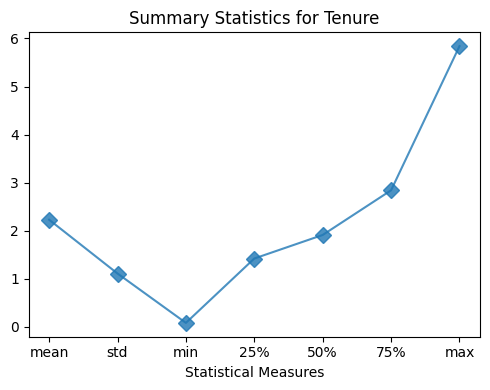

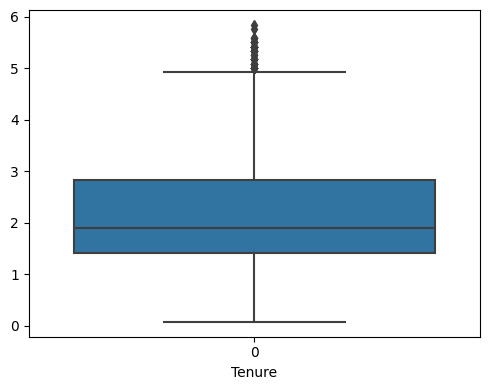

In [47]:
# Summary Plot

plt.figure(figsize=(5, 4))
df1['Tenure'].describe()[1:].plot(alpha = 0.8,
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for Tenure')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

# Box Plot

plt.figure(figsize=(5, 4))
sns.boxplot(df1['Tenure'])
plt.xlabel('Tenure')
plt.tight_layout()
plt.show()



##### Observations

| Sr.No. | Conclusion | Inferences |
| ------ | --------- | ---------- |
| 1.     | Summary Plot |  - The range for experience is 4 years. |
| 2.     | Box Plot | - There are few values with large tenure i.e outliers |



#### 1.2 Salary

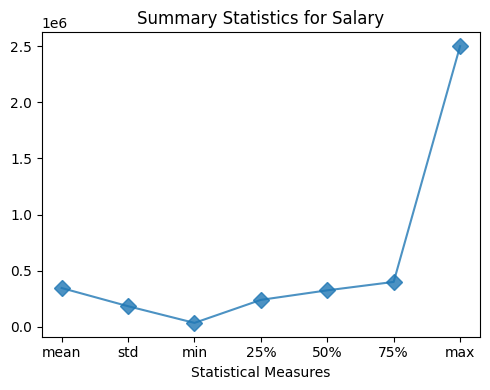

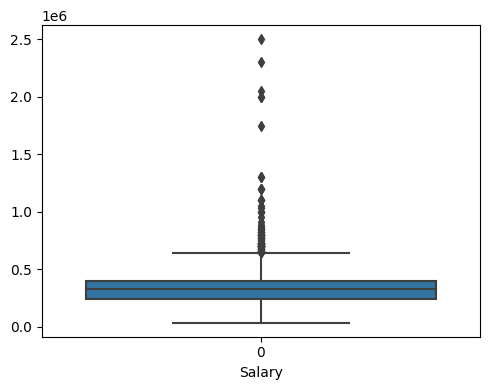

In [48]:
# Summary Plot

plt.figure(figsize=(5,4))
df1['Salary'].describe()[1:].plot(alpha = 0.8,
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for Salary')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()


# Box Plot

plt.figure(figsize=(5,4))
sns.boxplot(df1['Salary'])
plt.xlabel('Salary')
plt.tight_layout()
plt.show()



##### Observations

| **Conclusion** | **Inferences** |
|---|---|
| 1. Summary Plot | There is substantial variation in salary across the dataset. |
| 2. Box Plot | There is a notable concentration of data points with high salaries, as depicted by the box plot. |


#### 1.3 10th Percentage

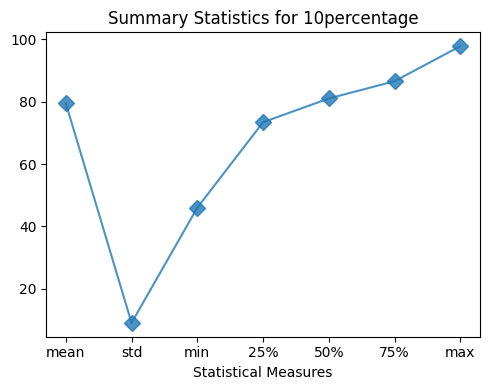

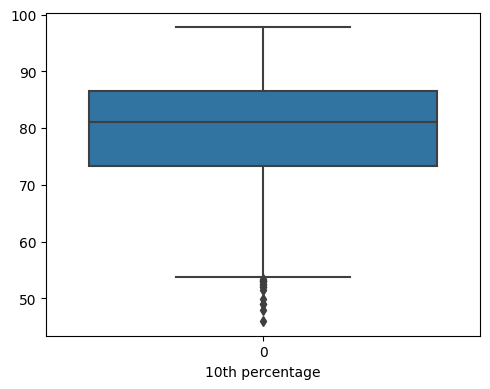

In [49]:
# Summary Plot

plt.figure(figsize=(5,4))
df1['10percentage'].describe()[1:].plot(alpha = 0.8,
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for 10percentage')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()


#Box Plot

plt.figure(figsize=(5,4))
sns.boxplot(df1['10percentage'])
plt.xlabel('10th percentage')
plt.tight_layout()
plt.show()



##### Observations

| **Conclusions** | **Inferences** |
|---|---|
| 1. Summary Plot | Around 50% of students achieved scores of approximately 80% or less. |
| 2. Box Plot | The presence of a few extreme outliers is evident from the box plot. |



#### 1.4 12th Percentage

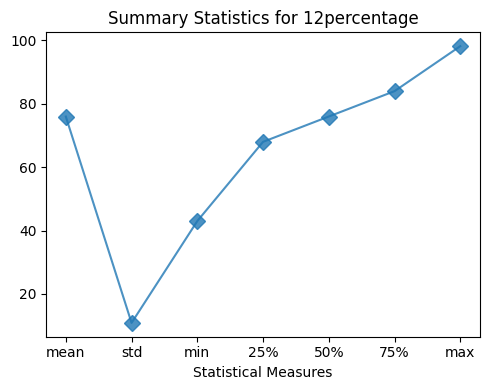

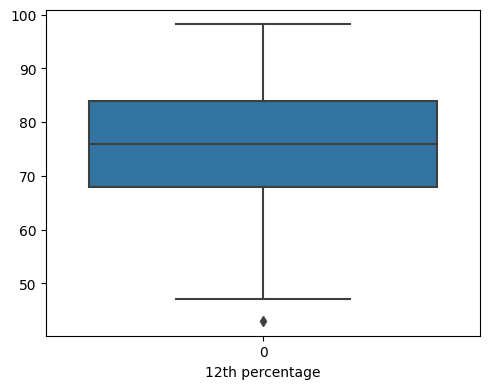

In [50]:
# Summary Plot

plt.figure(figsize=(5,4))
df1['12percentage'].describe()[1:].plot(alpha = 0.8,
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for 12percentage')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()


#Box Plot

plt.figure(figsize=(5,4))
sns.boxplot(df1['12percentage'])
plt.xlabel('12th percentage')
plt.tight_layout()
plt.show()



##### Observations

| **Conclusions** | **Inferences** |
|---|---|
| 1. Summary Plot | Roughly half of the students achieved scores of approximately 78% or lower. |
| 2. Box Plot | The box plot indicates only one data point with an extremely low score. |



#### 1.5 CollegeGPA

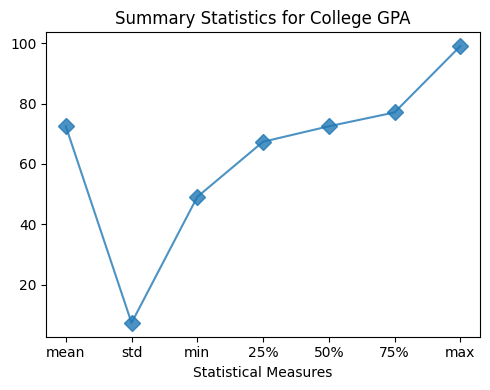

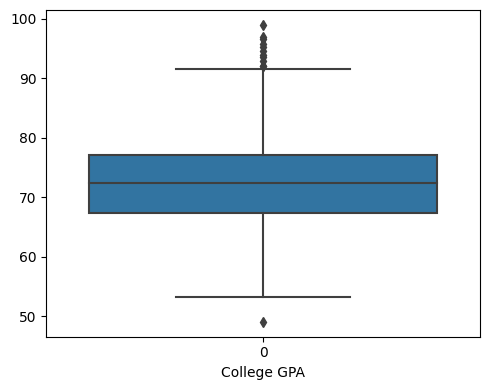

In [51]:
#Summary Plot

plt.figure(figsize=(5,4))
df1['collegeGPA'].describe()[1:].plot(alpha = 0.8,
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for College GPA')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()


# Box Plot

plt.figure(figsize=(5,4))
sns.boxplot(df1['collegeGPA'])
plt.xlabel('College GPA')
plt.tight_layout()
plt.show()



##### Observations

| **Conclusions** | **Inferences** |
|---|---|
| 1. Summary Plot | 75% of students had a GPA of approximately 80% or lower. |
| 2. Box Plot | The box plot reveals the presence of both low and high extreme values within the dataset. |


#### 1.6 English

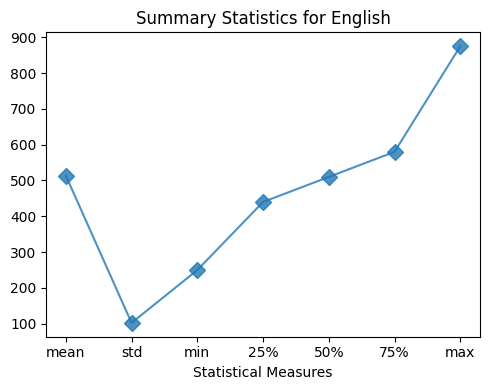

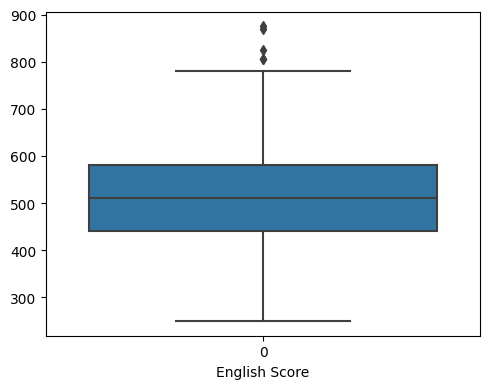

In [52]:
# Summary Plot

plt.figure(figsize=(5,4))
df1['English'].describe()[1:].plot(alpha = 0.8,
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for English')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()


# Box Plot

plt.figure(figsize=(5,4))
sns.boxplot(df1['English'])
plt.xlabel('English Score')
plt.tight_layout()
plt.show()



##### Observations

| **Conclusions**| **Paraphrased Version** |
|------------|-------------------------------------------------------------|
| Summary Plot                              | Half of the students scored below 500 in their English exams.                                                                      |
| Box Plot                                  | Both lower and higher extreme values are evident from the distribution representation.                                                                 |


#### 1.7 Logical

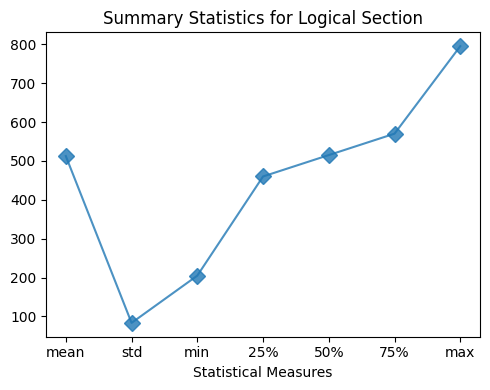

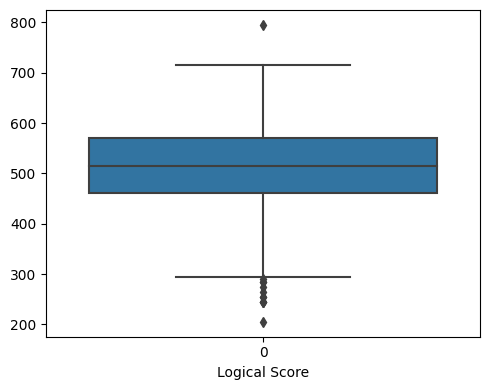

In [53]:
# Summary Plot

plt.figure(figsize=(5,4))
df1['Logical'].describe()[1:].plot(alpha = 0.8,
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for Logical Section')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()


# Box Plot

plt.figure(figsize=(5,4))
sns.boxplot(df1['Logical'])
plt.xlabel('Logical Score')
plt.tight_layout()
plt.show()



##### Observations

| **Conclusions** |**Inferences**  |
|-----|-----|
| Summary Plot | Half of the students scored below 500 in the logical exams. |
| Box Plot   | Presence of lower extreme values, with only one high extreme value being notable.      |


#### 1.8 Quant

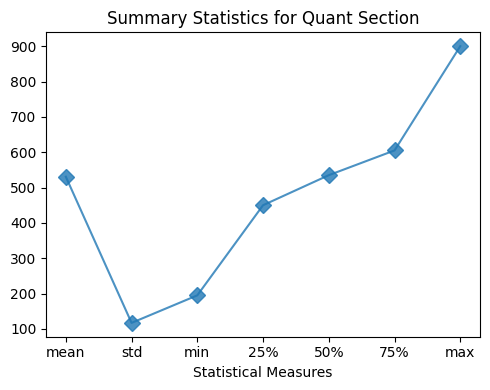

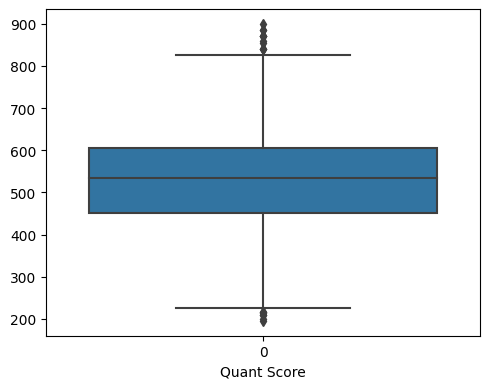

In [54]:
# Summary Plot

plt.figure(figsize=(5,4))
df1['Quant'].describe()[1:].plot(alpha = 0.8,
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for Quant Section')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()


# Box Plot

plt.figure(figsize=(5,4))
sns.boxplot(df1['Quant'])
plt.xlabel('Quant Score')
plt.tight_layout()
plt.show()



##### Observations

| **Conclusions**| **Inferences**                            |
|------|-----------------------------|
| Summary Plot           | 75% of students' logical score was less than 600.                                 |
| Box Plot               | The box plot shows the presence of both low and high extreme values.               |


#### 1.9 Computer Programming

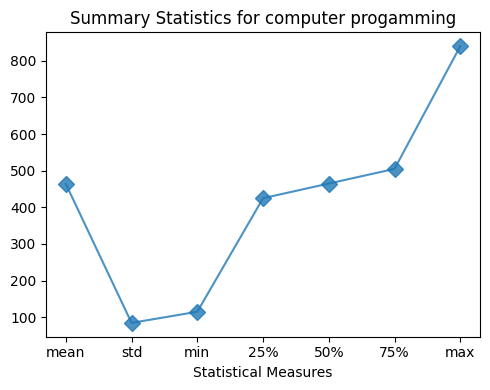

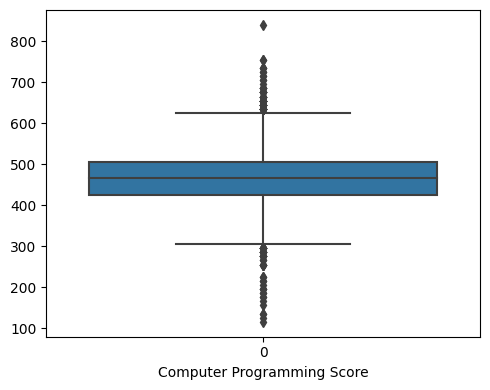

In [55]:
# Summary Plot

plt.figure(figsize=(5,4))
df1['ComputerProgramming'].describe()[1:].plot(alpha = 0.8,
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for computer progamming')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()


# Box Plot

plt.figure(figsize=(5,4))
sns.boxplot(df1['ComputerProgramming'])
plt.xlabel('Computer Programming Score')
plt.tight_layout()
plt.show()



##### Observations

| **Conclusions**           | **Inferences** Version                                                                |
|-----------------------|-------------------------------------------------------------------------------------|
| Summary Plot          | 50% of students' scores were below 500.                                            |
| Box Plot              | The box plot illustrates the presence of numerous low extreme values as well as high extreme values. |


#### 1.10 Electronics & Semiconductors

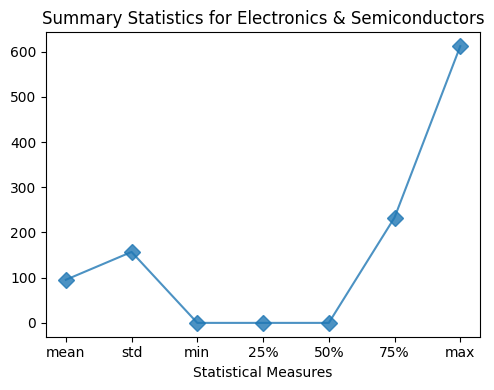

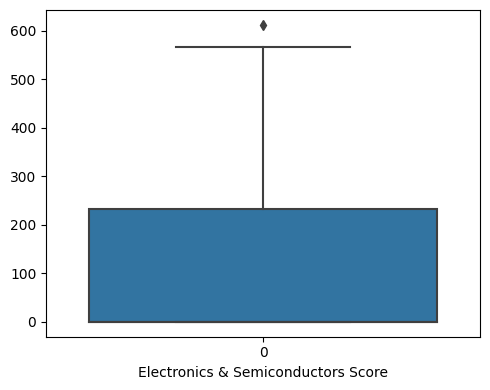

In [56]:
# Summary Plot

plt.figure(figsize=(5,4))
df1['ElectronicsAndSemicon'].describe()[1:].plot(alpha = 0.8,
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for Electronics & Semiconductors')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()



# Box Plot

plt.figure(figsize=(5,4))
sns.boxplot(df1['ElectronicsAndSemicon'])
plt.xlabel('Electronics & Semiconductors Score')
plt.tight_layout()
plt.show()



##### Observations

| **Conclusions**         | **Inferences**                                                           |
|-----------------------|---------------------------------------------------------------------------------|
| Summary Plot          | About 75% of students scored less than 250.                                    |
| Box Plot              | The lowest score is equal to the median of the dataset.                         |


#### 1.11 Age

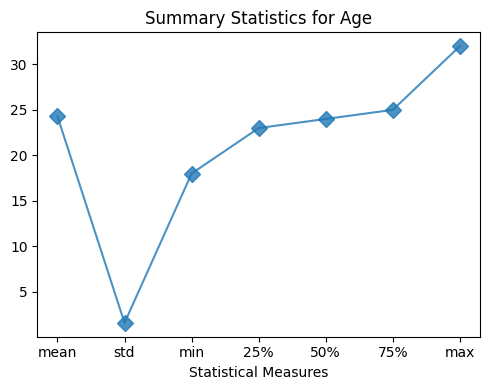

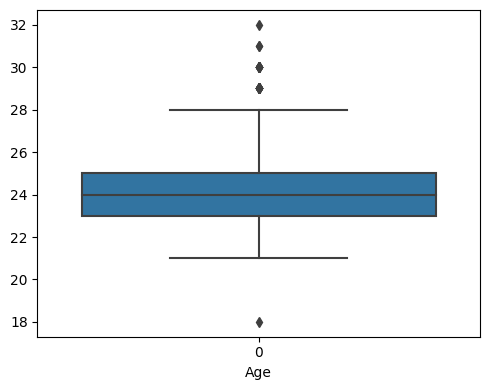

In [57]:
# Summary Plot

plt.figure(figsize=(5,4))
df1['Age'].describe()[1:].plot(alpha = 0.8,
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for Age')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()


# Box Plot

plt.figure(figsize=(5,4))
sns.boxplot(df1['Age'])
plt.xlabel('Age')
plt.tight_layout()
plt.show()



##### Observations

| **Conclusions**           | **Inferences**                                                            |
|-----------------------|---------------------------------------------------------------------------------|
| Summary Plot          | Approximately 75% of students are under 26 years old.                           |
| Box Plot              | The box plot indicates the presence of 4 students with very high ages and one with a very low age compared to other data points. |


### 2. Categorical Features

#### 2.1 Designation

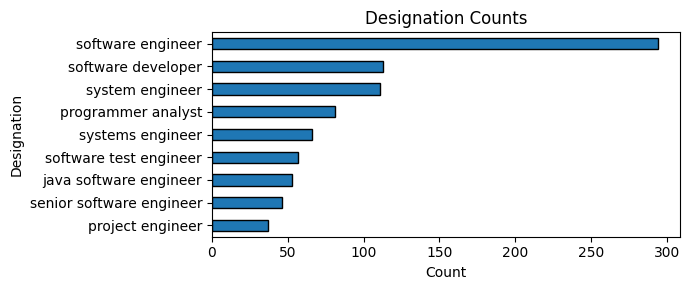

In [58]:
df1['Designation'].value_counts()[1:].sort_values(
    ascending=True
).plot(
    kind='barh',
    title='Designation Counts',
    figsize=(7, 3),
    ec='k'
)
plt.ylabel('Designation')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

##### Observations

Software engineer is the most common desgination of all, followed by system engineer and software developer.

**NOTE : This graph contains the most common designations. There exists *OTHER* category too.**

#### 2.2 JobCity

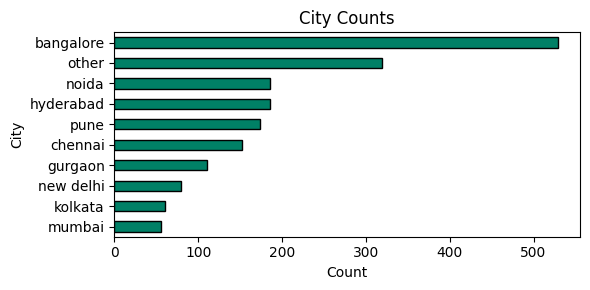

In [59]:
df1['JobCity'].value_counts().sort_values(ascending=True).plot(
    kind='barh',
    cmap='summer',
    title='City Counts',
    figsize=(6,3),
    ec='k'
)
plt.ylabel('City')
plt.xlabel('Count')
plt.tight_layout()
plt.show()


##### Observations

The most favourable city for job placements is bangalore, followed by Noid, Hyderabad and pune. Mumbai and kolkata being least favourable.
    

#### 2.3 Gender

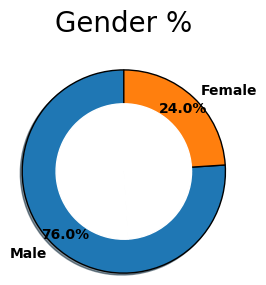

In [60]:
plt.figure(figsize=(3,3))
plt.pie(df1['Gender'].value_counts().tolist(),
        labels=df1['Gender'].value_counts().index,
        autopct='%1.1f%%',
        radius=1.5,
        wedgeprops={'edgecolor': 'k'},
        textprops={'fontsize': 10, 'fontweight': 'bold'},
        shadow=True,
        startangle=90,
        pctdistance=0.85)
plt.pie(df1['Gender'].value_counts().tolist(),
        colors=['white'],
        wedgeprops={'edgecolor': 'white'},
        radius=1)
plt.title('Gender %', pad=40, size=20)
plt.tight_layout()
plt.show()


##### Observations

The dataset is not balanced in terms of gender as the population of Male is really larger as compared to the female one.

#### 2.4 10board & 12board

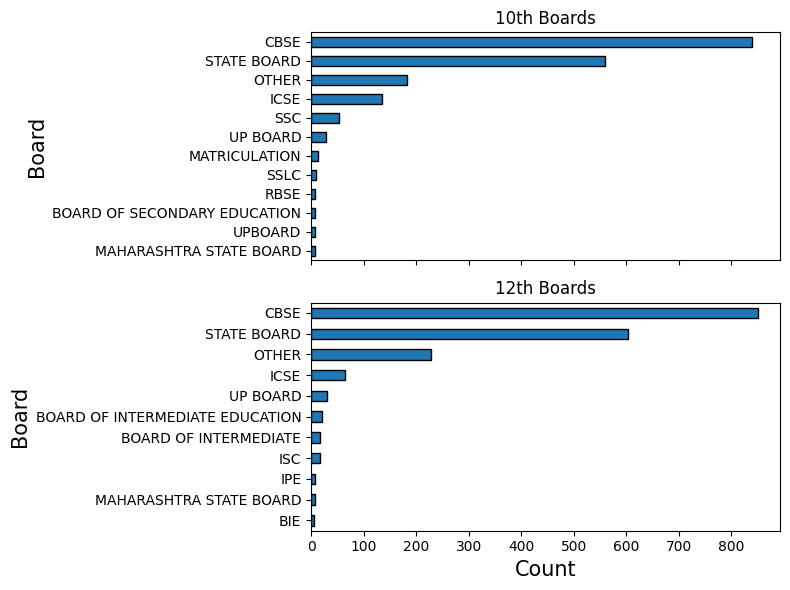

In [61]:
fig, ax = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

df1['10board'].str.upper().value_counts().sort_values(ascending=True).plot(
    kind='barh',
    ax=ax[0],
    ec='k',
    title='10th Boards'
)
ax[0].set_ylabel('Board', size=15)

df1['12board'].str.upper().value_counts().sort_values(ascending=True).plot(
    kind='barh',
    ax=ax[1],
    ec='k',
    title='12th Boards'
)
ax[1].set_ylabel('Board', size=15)
ax[1].set_xlabel('Count', size=15)

plt.tight_layout()
plt.show()

##### Observations

CBSE is the most common school board for both 12th and 10th.

#### 2.5 CollegeTier

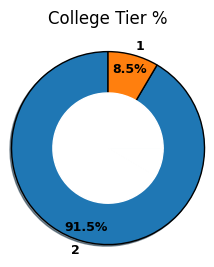

In [62]:
plt.figure(figsize=(3,3))
plt.pie(df1['CollegeTier'].value_counts().tolist(), labels = df1['CollegeTier'].value_counts().index,
       autopct = '%1.1f%%',
       radius = 1.75,
       wedgeprops = {'edgecolor':'k'},
       textprops = {'fontsize':9,'fontweight':'bold'},
       shadow = True,
       startangle = 90,
       pctdistance = 0.85)
plt.pie(df1['CollegeTier'].value_counts().tolist(), colors = ['white'],
        wedgeprops = {'edgecolor':'white'},
       radius = 1)
plt.title('College Tier %',pad = 40, size = 12)
plt.margins(0.02)
plt.tight_layout()
plt.show()

##### Observations

Almost all the college belongs to Tier 1 only with a percentage of 91.5

#### 2.6 Degree

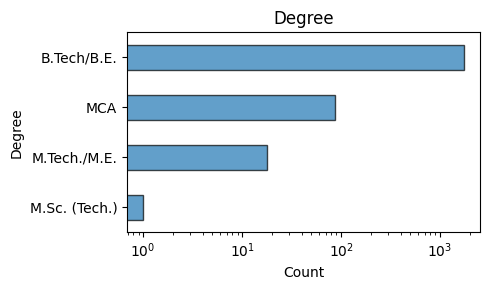

In [63]:
df1['Degree'].value_counts().sort_values(ascending=True).plot(
    kind='barh',
    title='Degree',
    figsize=(5, 3),
    ec='k',
    alpha=0.7
)
plt.ylabel('Degree')
plt.xlabel('Count')
plt.xscale('log')
plt.tight_layout()
plt.show()


##### Observations

Most of the students have done their graduation in B.Tech and there are very less students from M.Sc(Tech)

#### 2.7 CollegeCityTier

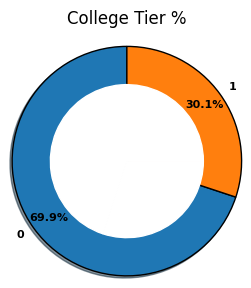

In [64]:
plt.figure(figsize=(3,3))
plt.pie(df1['CollegeCityTier'].value_counts().tolist(), labels = df1['CollegeCityTier'].value_counts().index,
       autopct = '%1.1f%%',
       radius = 1.5,
       wedgeprops = {'edgecolor':'k'},
       textprops = {'fontsize':8,'fontweight':'bold'},
       shadow = True,
       startangle = 90,
       pctdistance = 0.84)
plt.pie(df1['CollegeCityTier'].value_counts().tolist(), colors = ['white'],
        wedgeprops = {'edgecolor':'white'},
       radius = 1)
plt.title('College Tier %',pad = 30, size = 12)
plt.margins(0.02)
plt.tight_layout()
plt.show()

##### Observations

Majority of the colleges are form Tier 0 city.

#### 2.8 GraduationYear

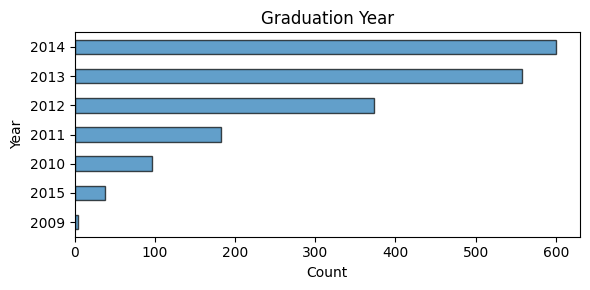

In [65]:
df1['GraduationYear'].value_counts().sort_values(ascending=True).plot(
    kind='barh',
    title='Graduation Year',
    figsize=(6, 3),
    ec='k',
    alpha=0.7
)
plt.ylabel('Year')
plt.xlabel('Count')
plt.tight_layout()
plt.show()



 Observations

    Maximum number of students were graduated in 2013, followed by the year 2014 and 2012.

### Removing Outliers

In [66]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [67]:
df1.columns

Index(['Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityTier', 'CollegeState', 'GraduationYear', 'English',
       'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'Age', 'Tenure'],
      dtype='object')

In [68]:
columns = ['Salary','10percentage','12percentage','English',
          'Logical','Quant','Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'Age', 'Tenure']
df2 = df1.copy()

In [69]:
for cols in columns:
    lowerbound, upperbound = outlier_treatment(df2[cols])

    df2 = df2.drop(df2[(df2[cols] < lowerbound) | (df2[cols] > upperbound)].index)

In [70]:
print(f'Number of observation with outliers: {df1.shape[0]}')
print(f'Number of observations without outliers: {df2.shape[0]}')

Number of observation with outliers: 1852
Number of observations without outliers: 1447


## Bivariate Analysis

### 1. Barplots

#### 1.1 Average Salary for each Designation

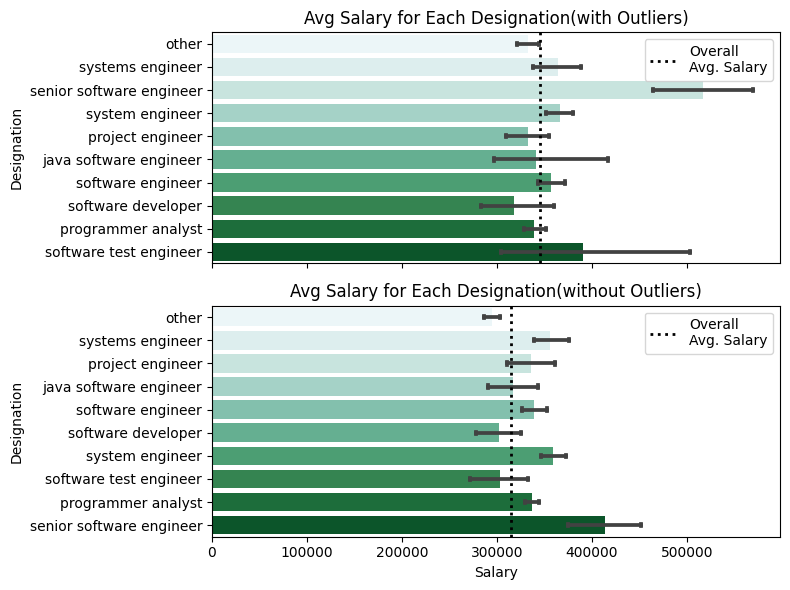

In [71]:
fig, ax = plt.subplots(2, 1, figsize = (8,6), sharex = True)
sns.barplot(x = 'Salary', y = 'Designation',
           data = df1,
           palette = 'BuGn',
           capsize = 0.1,
           ax = ax[0])
ax[0].axvline(df1['Salary'].mean(), color = 'k',
           linestyle = ':',
           linewidth = 2, label = 'Overall\nAvg. Salary')
ax[0].set_title('Avg Salary for Each Designation(with Outliers)')
ax[0].legend()
ax[0].set_xlabel('')


sns.barplot(x = 'Salary', y = 'Designation',
           data = df2,
           palette = 'BuGn',
           capsize = 0.1,
           ax = ax[1])
ax[1].axvline(df2['Salary'].mean(), color = 'k',
           linestyle = ':',
           linewidth = 2, label = 'Overall\nAvg. Salary')
ax[1].set_title('Avg Salary for Each Designation(without Outliers)')
ax[1].legend()
ax[1].set_xlabel('Salary')

plt.tight_layout()
plt.show()

##### Observations

Bar plot shows the maximum salary for each Designation. Senior Software Engineer has the highest salary but they also has the maximum standard deviation in their salary. There are only two designations namely, software developer and technical support engineer who has salary lower than average salary.

#### 1.2 Average Salary for each Gender

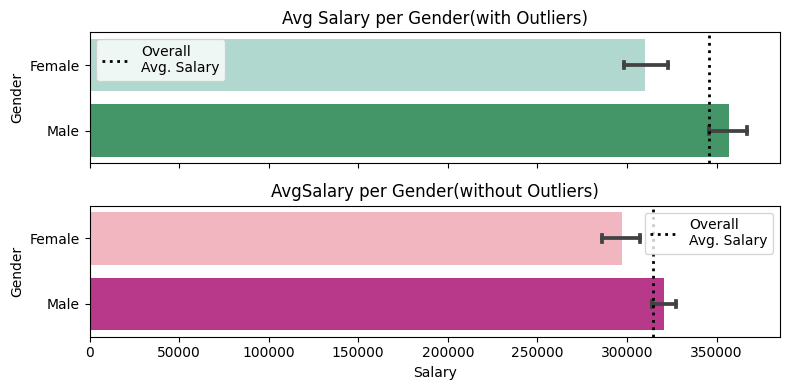

In [72]:
fig, ax = plt.subplots(2, 1, figsize = (8,4), sharex = True)
sns.barplot(x = 'Salary', y = 'Gender',
           data = df1,
           palette = 'BuGn',
           capsize = 0.1,
           ax = ax[0])
ax[0].axvline(df1['Salary'].mean(), color = 'k',
           linestyle = ':',
           linewidth = 2, label = 'Overall\nAvg. Salary')
ax[0].set_title('Avg Salary per Gender(with Outliers)')
ax[0].legend()
ax[0].set_xlabel('')


sns.barplot(x = 'Salary', y = 'Gender',
           data = df2,
           palette = 'RdPu',
           capsize = 0.1,
           ax = ax[1])
ax[1].axvline(df2['Salary'].mean(), color = 'k',
           linestyle = ':',
           linewidth = 2, label = 'Overall\nAvg. Salary')
ax[1].set_title('AvgSalary per Gender(without Outliers)')
ax[1].legend()
ax[1].set_xlabel('Salary')


plt.tight_layout()
plt.show()

##### Observations

The average salary for both male and female is approximately equal and it implies that there was no gender bias in terms of salary. It is also plausible to say that Female's get salary below the overall average salary.

### 2. Scatter Plots

#### 2.1 Salary & 10th score

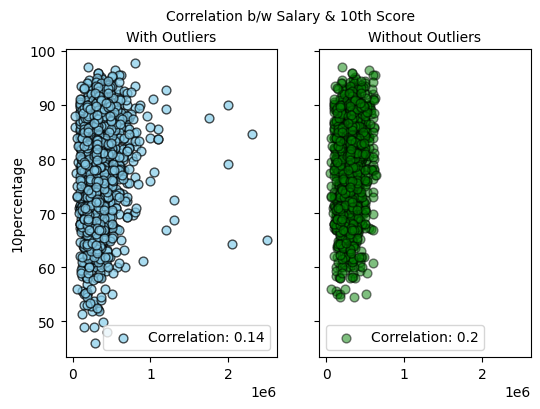

In [73]:
fig, ax = plt.subplots(1, 2, figsize = (6,4), sharex = True, sharey = True)

ax[0].scatter(df1['Salary'],df1['10percentage'],
               ec = 'k',
               color = 'skyblue',
               alpha = 0.7,
               s = 40,
               label = f"Correlation: {round(df1[['Salary','10percentage']].corr().iloc[1,0],2)}"
               )
ax[0].set_ylabel('10percentage')
ax[0].set_title('With Outliers', size=10)
ax[0].legend()


ax[1].scatter(df2['Salary'],df2['10percentage'],
               ec = 'k',
               color = 'green',
               alpha = 0.5,
               s = 40,
               label = f"Correlation: {round(df2[['Salary','10percentage']].corr().iloc[1,0],2)}"
               )
ax[1].set_title('Without Outliers', size=10)
ax[1].legend()


fig.suptitle('Correlation b/w Salary & 10th Score', size = 10)
plt.show()

##### Observations

There does not exist any correlation between Salary and 10th scores.

#### 2.2 Salary & 12th score

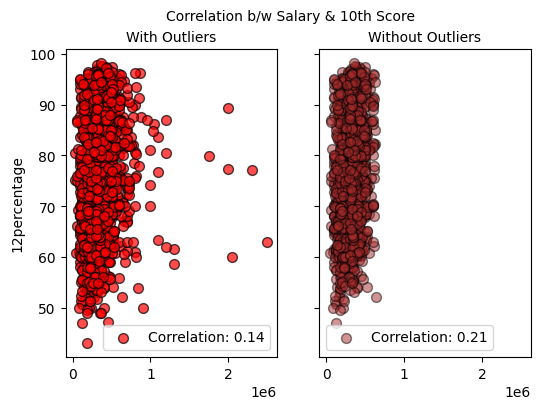

In [74]:
fig, ax = plt.subplots(1, 2, figsize = (6,4), sharex = True, sharey = True)

ax[0].scatter(df1['Salary'],df1['12percentage'],
               ec = 'k',
               color = 'red',
               alpha = 0.7,
               s = 50,
               label = f"Correlation: {round(df1[['Salary','12percentage']].corr().iloc[1,0],2)}"
               )
ax[0].set_ylabel('12percentage')
ax[0].set_title('With Outliers', size=10)
ax[0].legend()


ax[1].scatter(df2['Salary'],df2['12percentage'],
               ec = 'k',
               color = 'brown',
               alpha = 0.5,
               s = 50,
               label = f"Correlation: {round(df2[['Salary','12percentage']].corr().iloc[1,0],2)}"
               )
ax[1].set_title('Without Outliers', size=10)
ax[1].legend()

fig.suptitle('Correlation b/w Salary & 10th Score', size = 10)
plt.show()

##### Observations

There does not exist any correlation between Salary and 10th scores.

#### 2.3 Salary & CollegeGPA score

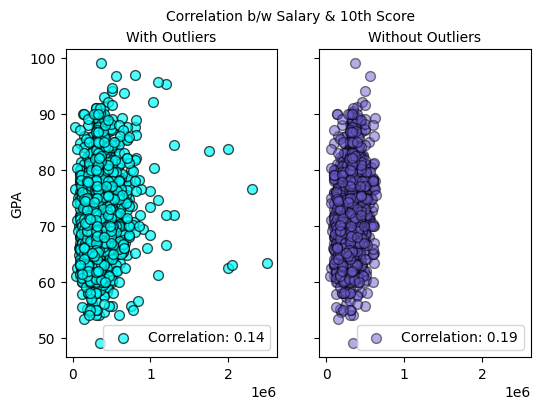

In [75]:
fig, ax = plt.subplots(1, 2, figsize = (6,4), sharex = True, sharey = True)

ax[0].scatter(df1['Salary'],df1['collegeGPA'],
               ec = 'k',
               color = 'cyan',
               alpha = 0.7,
               s = 50,
               label = f"Correlation: {round(df1[['Salary','collegeGPA']].corr().iloc[1,0],2)}"
               )
ax[0].set_ylabel('GPA')
ax[0].set_title('With Outliers', size=10)
ax[0].legend()


ax[1].scatter(df2['Salary'],df2['collegeGPA'],
               ec = 'k',
               color = 'slateblue',
               alpha = 0.5,
               s = 50,
               label = f"Correlation: {round(df2[['Salary','collegeGPA']].corr().iloc[1,0],2)}"
               )
ax[1].set_title('Without Outliers', size=10)
ax[1].legend()

fig.suptitle('Correlation b/w Salary & 10th Score', size = 10)
plt.show()

##### Observations

There does not exist any correlation between Salary and 10th scores.

#### 2.4 Salary & Age

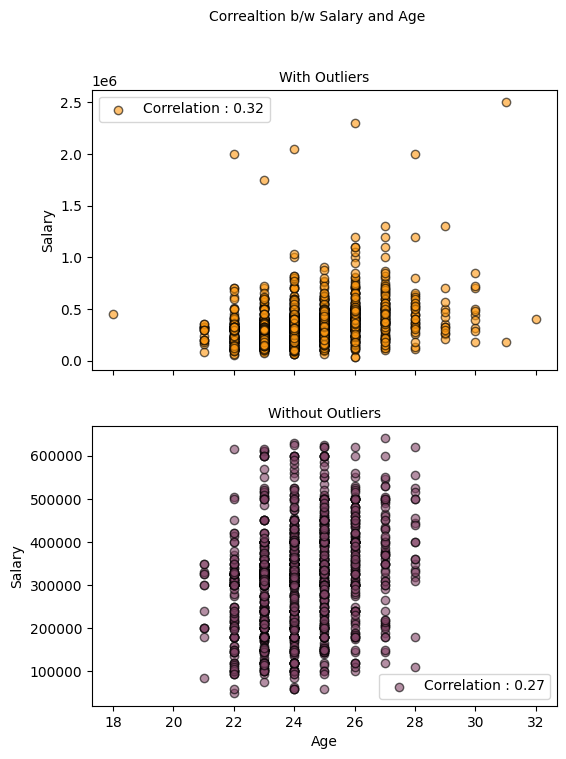

In [76]:
fig, ax = plt.subplots(2, 1, figsize = (6,8), sharex  = True)
ax[0].scatter(df1['Age'], df1['Salary'],
             ec = 'k',
             color = '#ff9911',
             alpha = 0.6,
             label = f"Correlation : {round(df1[['Age','Salary']].corr().iloc[1,0],2)}"
             )
ax[0].legend()
ax[0].set_ylabel('Salary')
ax[0].set_title('With Outliers' , size=10)


ax[1].scatter(df2['Age'], df2['Salary'],
             ec = 'k',
             color = '#834567',
             alpha = 0.6,
             label = f"Correlation : {round(df2[['Age','Salary']].corr().iloc[1,0],2)}"
             )
ax[1].legend()
ax[1].set_ylabel('Salary')
ax[1].set_title('Without Outliers' , size=10)
ax[1].set_xlabel('Age')

fig.suptitle('Correaltion b/w Salary and Age', size = 10)

plt.show()

##### Observations

After removing the outliers, it is evident that the salary and age are not related to each other.

#### 2.5 Salary & Tenure

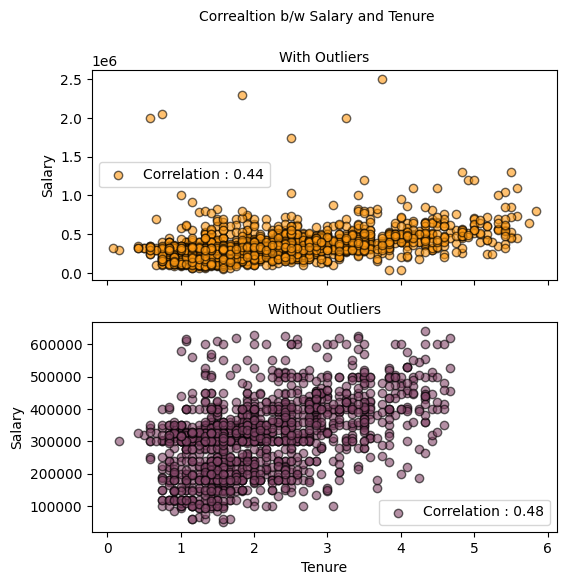

In [77]:
fig, ax = plt.subplots(2, 1, figsize = (6,6), sharex  = True)
ax[0].scatter(df1['Tenure'], df1['Salary'],
             ec = 'k',
             color = '#ff9911',
             alpha = 0.6,
             label = f"Correlation : {round(df1[['Tenure','Salary']].corr().iloc[1,0],2)}"
             )
ax[0].legend()
ax[0].set_ylabel('Salary')
ax[0].set_title('With Outliers' , size=10)


ax[1].scatter(df2['Tenure'], df2['Salary'],
             ec = 'k',
             color = '#834567',
             alpha = 0.6,
             label = f"Correlation : {round(df2[['Tenure','Salary']].corr().iloc[1,0],2)}"
             )
ax[1].legend()
ax[1].set_ylabel('Salary')
ax[1].set_title('Without Outliers' , size=10)
ax[1].set_xlabel('Tenure')

fig.suptitle('Correaltion b/w Salary and Tenure', size = 10)

plt.show()

##### Observations

After removing the outliers, it is evident that salary gets about 50% of increment as tenure increase as there is a positive correlation of 0.60.


#### 2.6 Salary with English, Quants, Logical

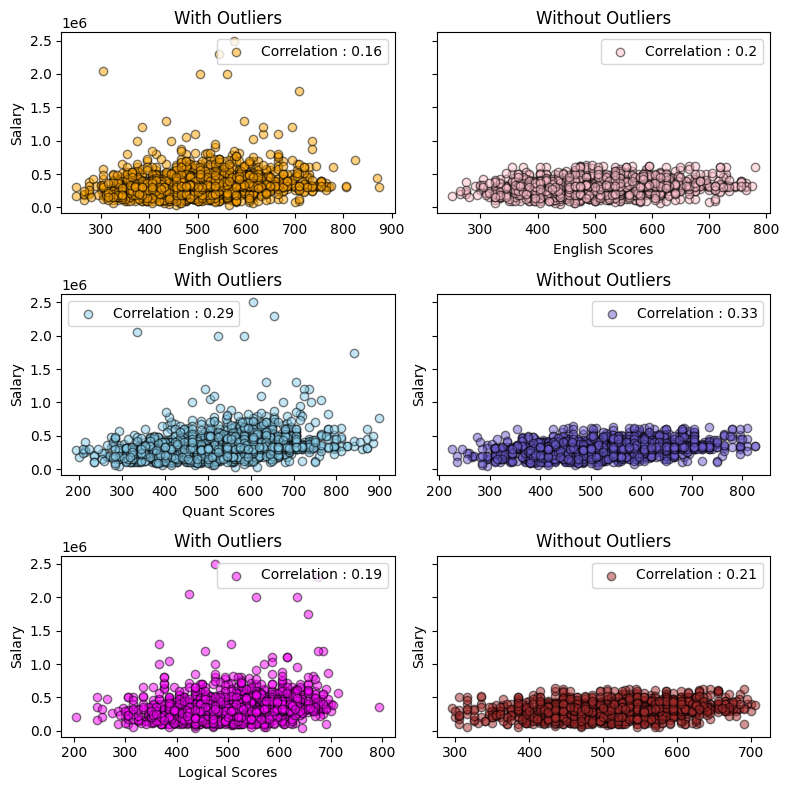

In [78]:
fig, ax = plt.subplots(3, 2, figsize = (8,8), sharey = True)
ax[0,0].scatter(df1['English'],df1['Salary'],
               ec = 'k',
               color = 'orange',
               alpha = 0.5,
               label = f"Correlation : {round(df1[['English','Salary']].corr().iloc[1,0],2)}"
               )
ax[0,0].set_ylabel('Salary')
ax[0,0].set_xlabel('English Scores')
ax[0,0].set_title('With Outliers')
ax[0,0].legend()


ax[0,1].scatter(df2['English'],df2['Salary'],
               ec = 'k',
               color = 'pink',
               alpha = 0.5,
               label = f"Correlation : {round(df2[['English','Salary']].corr().iloc[1,0],2)}"
               )
ax[0,1].set_title('Without Outliers')
ax[0,1].set_xlabel('English Scores')
ax[0,1].legend()




ax[1,0].scatter(df1['Quant'],df1['Salary'],
               ec = 'k',
               color = 'skyblue',
               alpha = 0.5,
               label = f"Correlation : {round(df1[['Quant','Salary']].corr().iloc[1,0],2)}"
               )
ax[1,0].set_ylabel('Salary')
ax[1,0].set_xlabel('Quant Scores')
ax[1,0].set_title('With Outliers')
ax[1,0].legend()


ax[1,1].scatter(df2['Quant'],df2['Salary'],
               ec = 'k',
               color = 'slateblue',
               alpha = 0.5,
               label = f"Correlation : {round(df2[['Quant','Salary']].corr().iloc[1,0],2)}"
               )
ax[1,1].set_ylabel('Salary')
ax[1,1].set_title('Without Outliers')
ax[1,1].legend()



ax[2,0].scatter(df1['Logical'],df1['Salary'],
               ec = 'k',
               color = 'magenta',
               alpha = 0.5,
               label = f"Correlation : {round(df1[['Logical','Salary']].corr().iloc[1,0],2)}"
               )
ax[2,0].set_ylabel('Salary')
ax[2,0].set_xlabel('Logical Scores')
ax[2,0].set_title('With Outliers')
ax[2,0].legend()


ax[2,1].scatter(df2['Logical'],df2['Salary'],
               ec = 'k',
               color = 'brown',
               alpha = 0.5,
               label = f"Correlation : {round(df2[['Logical','Salary']].corr().iloc[1,0],2)}"
               )
ax[2,1].set_ylabel('Salary')
ax[2,1].set_title('Without Outliers')
ax[2,1].legend()


plt.tight_layout()
plt.show()

##### Observations

The scatters plots above gives adequate evidence that salary is not effected by any of the above scores.

### 3. Crosstabs

#### 3.1 Gender and Specialization

<Axes: ylabel='Specialization'>

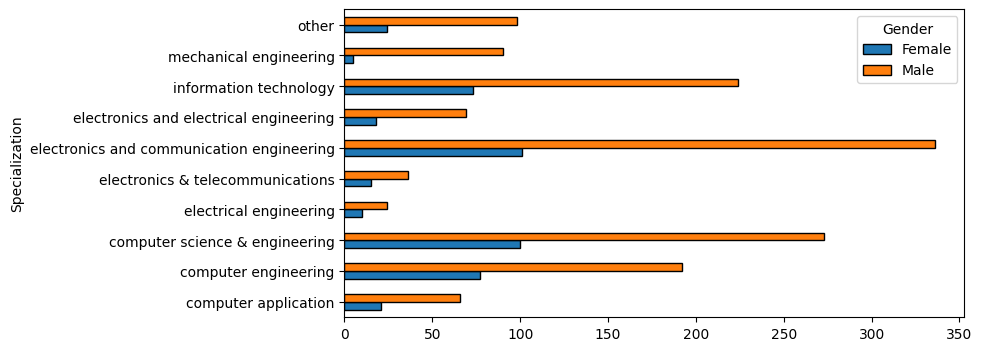

In [79]:
pd.crosstab(df1['Gender'],df1['Specialization']).T.plot(kind = 'barh',
                                                     ec = 'k',
                                                     figsize = (8,4))

##### Observations

There are almost males 2 times as of females in every specialization. Also, there are very less number of females who opted for mechanical and electronics.

### 4. Pivot Tables

#### 4.1 Average Salary per JobCity

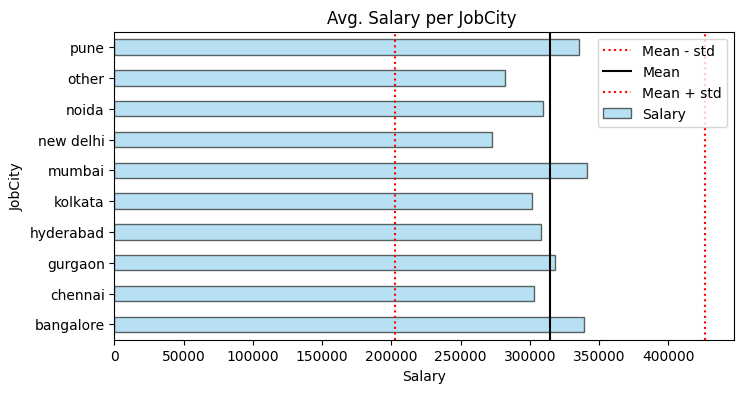

In [80]:
pd.pivot_table(index = 'JobCity',
              values = 'Salary',
              data = df2).plot(kind = 'barh',
                             ec = 'k',
                            alpha = 0.6,
                                  color = 'skyblue',
                                  title = 'Avg. Salary per JobCity ',
                                  figsize = (8,4))
plt.xlabel('Salary')
plt.axvline(df2['Salary'].mean() - df2['Salary'].std(),
            color = 'red',
           linestyle = ':',
           label = 'Mean - std')
plt.axvline(df2['Salary'].mean(), color = 'k', label = 'Mean')
plt.axvline(df2['Salary'].mean() + df2['Salary'].std(), color = 'red',
           linestyle = ':',
           label = 'Mean + std')
plt.legend()
plt.show()

#### 4.2 Average Salary per CollegeTier

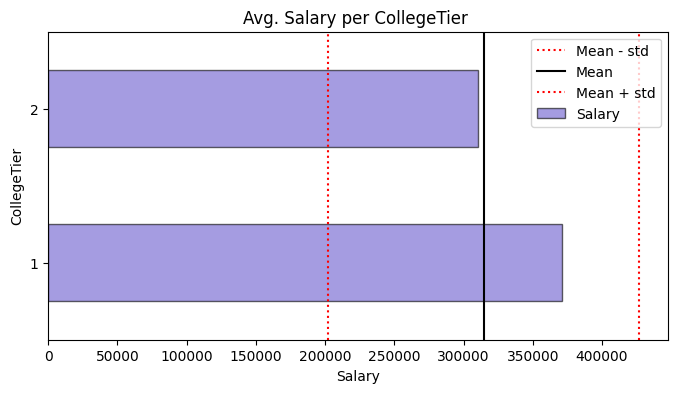

In [81]:
pd.pivot_table(index = 'CollegeTier',
              values = 'Salary',
              data = df2).plot(kind = 'barh',
                            alpha = 0.6,
                                  color = 'slateblue',
                                  title = 'Avg. Salary per CollegeTier ',
                                  figsize = (8,4),
                                  ec = 'k')
plt.xlabel('Salary')
plt.axvline(df2['Salary'].mean() - df2['Salary'].std(),
            color = 'red',
           linestyle = ':',
           label = 'Mean - std')
plt.axvline(df2['Salary'].mean(), color = 'k', label = 'Mean')
plt.axvline(df2['Salary'].mean() + df2['Salary'].std(), color = 'red',
           linestyle = ':',
           label = 'Mean + std')
plt.legend()
plt.show()

##### Observations

College within Tier 1 offers high salary as compared to the colleges in TIer 2. Colleges in Tier 2 offers below overall average salary.

#### 4.3 Average Salary per CollegeCityTier

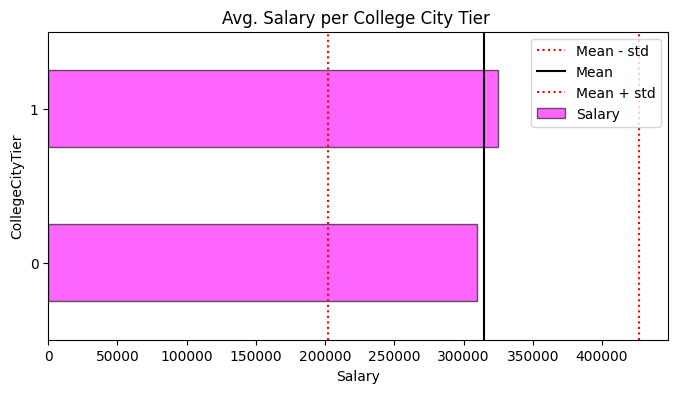

In [82]:
pd.pivot_table(index = 'CollegeCityTier',
              values = 'Salary',
              data = df2).plot(kind = 'barh',
                            alpha = 0.6,
                                  color = 'magenta',
                                  title = 'Avg. Salary per College City Tier ',
                                  figsize = (8,4),
                                  ec = 'k')
plt.xlabel('Salary')
plt.axvline(df2['Salary'].mean() - df2['Salary'].std(),
            color = 'red',
           linestyle = ':',
           label = 'Mean - std')
plt.axvline(df2['Salary'].mean(), color = 'k', label = 'Mean')
plt.axvline(df2['Salary'].mean() + df2['Salary'].std(), color = 'red',
           linestyle = ':',
           label = 'Mean + std')
plt.legend()
plt.show()

##### Obervations

Cities under Tier 1 and 2 offers almost same salaries to students.

## Research Questions

### 1. Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.”


#### Solution with Visualization

In [84]:
designations = ameo_data['Designation'].value_counts().sort_index()
pd.set_option('display.max_rows', None)

print(designations)

Designation
.net developer                             34
.net web developer                          4
account executive                           4
account manager                             1
admin assistant                             2
administrative coordinator                  1
administrative support                      1
aircraft technician                         1
android developer                          46
application developer                      52
application engineer                       22
apprentice                                  3
ase                                         3
asp.net developer                          26
assistant administrator                     1
assistant electrical engineer               2
assistant engineer                          4
assistant manager                          52
assistant professor                        12
assistant programmer                        3
assistant software engineer                 3
assistant store manage

In [85]:
ameo_data['Designation'] = ameo_data['Designation'].replace([
    'programmer analyst trainee', 'programmer analyst'
], 'programmer analyst'
)

ameo_data['Designation'] = ameo_data['Designation'].replace([
    'software eng', 'software engg', 'software engineer', 'software engineere', 'software enginner'
], 'software engineer'
)

In [86]:
df3 = ameo_data[(ameo_data["Designation"].isin(["programmer analyst", "software engineer", "hardware engineer", "associate engineer"])) &
                (ameo_data["Specialization"].isin(["computer science & engineering", "computer engineering"]))]


C:\Users\KIRAN\AppData\Local\Temp\ipykernel_17960\3672005199.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


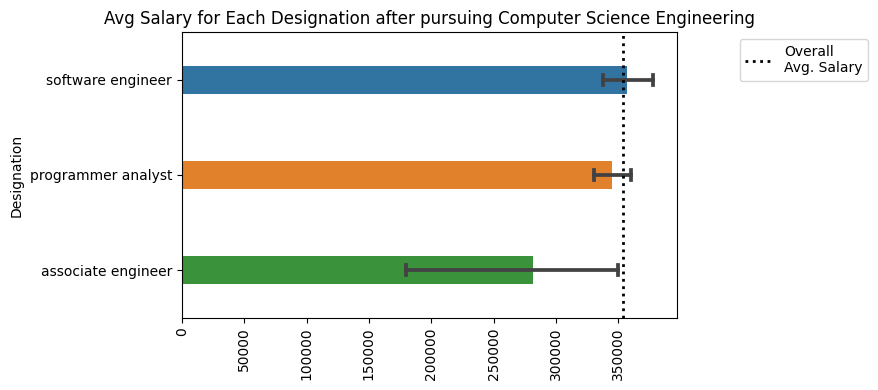

In [87]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.barplot(x='Salary', y='Designation',
            data=df3,
            capsize=0.1,
            width=0.3,
            ax=ax)
ax.axvline(df3['Salary'].mean(), color='k',
           linestyle=':',
           linewidth=2, label='Overall\nAvg. Salary')
ax.set_title('Avg Salary for Each Designation after pursuing Computer Science Engineering')
ax.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
ax.set_xlabel('')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()


#### Solution considering all designations at once in Hypothesis

In [88]:
import random
n = 40
salary_random = random.sample(df3['Salary'].tolist(),n)
print(salary_random)

[400000, 180000, 325000, 120000, 330000, 350000, 400000, 305000, 355000, 360000, 120000, 200000, 95000, 300000, 300000, 325000, 475000, 360000, 190000, 455000, 150000, 600000, 380000, 350000, 550000, 550000, 380000, 305000, 450000, 360000, 545000, 300000, 350000, 500000, 420000, 200000, 390000, 500000, 230000, 450000]


##### Function for T-Score

In [89]:
def t_score(sample_size, sample_mean, pop_mean, sample_std):
    numerator = sample_mean - pop_mean
    denomenator = sample_std / sample_size**0.5
    return numerator / denomenator

##### Calculating sample values

In [90]:
from scipy.stats import t,norm
import statistics

print('Sample Mean: ', statistics.mean(salary_random))
print('Sample Standard Deviation: ', statistics.stdev(salary_random))

Sample Mean:  347625
Sample Standard Deviation:  126440.35535199377


In [91]:
sample_size = 40
sample_mean = statistics.mean(salary_random)
pop_mean = 275000
sample_std = statistics.stdev(salary_random)

##### Calculating **t_value**

In [92]:
t_value = t_score(sample_size, sample_mean, pop_mean, sample_std)
print(t_value)

3.6327075233280284


##### Calculating **t_critical**

In [93]:
confidence_level = 0.95

alpha = 1 - confidence_level

t_critical = t.ppf(1 - alpha/2, df = 99)

print(t_critical)

1.9842169515086827


##### One Sample t-test Visualization

Text(347625, 0.7, 'x_bar')

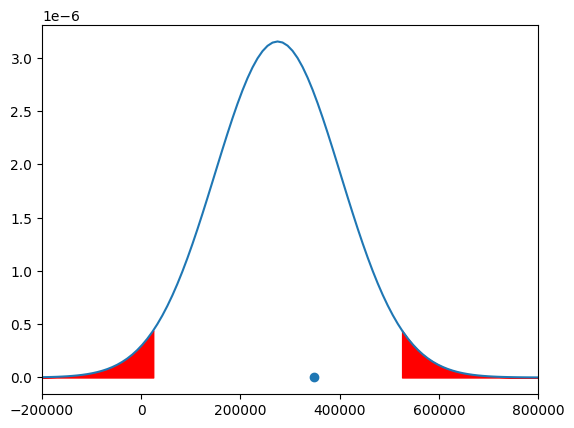

In [94]:
x_min = -200000
x_max = 800000

mean = pop_mean
std = sample_std

x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)

t_critical_left = pop_mean + (-t_critical * std)
t_critical_right = pop_mean + (t_critical * std)

x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='red')

x2 = np.linspace(t_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='red')

plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.7))

In [95]:
if(t_value < t_critical):
    print("There is not enough evidence to reject the Null Hypothesis")
else:
    print("There is sufficent evidence to reject the Null Hypothesis")

There is sufficent evidence to reject the Null Hypothesis


In [96]:
p_value = 2 * (1.0 - norm.cdf(np.abs(t_value)))

print("p_value = ", p_value)

if(p_value > alpha):
    print("There is not enough evidence to reject the Null Hypothesis")
else:
    print("There is sufficent evidence to reject the Null Hypothesis")

p_value =  0.00028046285432981044
There is sufficent evidence to reject the Null Hypothesis


##### Observations

| Test | Value |
| -- | -- |
| t_value | 4.160393243881741 |
| t_critical | 1.9842169515086827 |
| p_value | 3.177000951049003e-05 |

- As the result of the hypothesis testing we see that the claim is false.
- For this claim Null Hupothesis fails.
- The **t_critical** and probability value i.e. **p_value** claiming it as wrong.

#### Solution considering Individual Designations Hypothesis

In [97]:
job_group = df3.groupby('Designation')
job_salary_mean = job_group['Salary'].mean()
job_salary_std = job_group['Salary'].std()

In [98]:
print("Mean salaries for different job roles:")
print(job_salary_mean)

print("\nStandard deviation of salaries for different job roles:")
print(job_salary_std)

Mean salaries for different job roles:
Designation
associate engineer    281666.666667
programmer analyst    345267.857143
software engineer     356820.000000
Name: Salary, dtype: float64

Standard deviation of salaries for different job roles:
Designation
associate engineer     89768.220063
programmer analyst     55844.098271
software engineer     165473.604102
Name: Salary, dtype: float64


In [99]:
alpha = 0.05

In [100]:
from scipy.stats import ttest_1samp

prog_analyst_salaries = df3.loc[df3['Designation'] == 'programmer analyst', 'Salary'].values
software_eng_salaries = df3.loc[df3['Designation'] == 'software engineer', 'Salary'].values
hardware_eng_salaries = df3.loc[df3['Designation'] == 'hardware engineer', 'Salary'].values
assoc_eng_salaries = df3.loc[df3['Designation'] == 'associate engineer', 'Salary'].values

expected_range = (250000, 300000)

for job, salaries in [("programmer analyst", prog_analyst_salaries),
                      ("software engineer", software_eng_salaries),
                      ("hardware engineer", hardware_eng_salaries),
                      ("associate engineer", assoc_eng_salaries)]:

    t_stat, p_val = ttest_1samp(salaries, expected_range[0], alternative='greater')

    print(f"One-sample t-test for {job}:")
    print(f"  t_critical: {t_stat:.2f}")
    print(f"  p_value: {p_val:.5e}")

    if p_val < 0.05:
        print("  Result: There is sufficent evidence to reject the Null Hypothesis\n")
    else:
        print("  Result: There is not enough evidence to reject the Null Hypothesis\n")

One-sample t-test for programmer analyst:
  t_critical: 12.77
  p_value: 2.20314e-18
  Result: There is sufficent evidence to reject the Null Hypothesis

One-sample t-test for software engineer:
  t_critical: 10.21
  p_value: 5.81591e-21
  Result: There is sufficent evidence to reject the Null Hypothesis

One-sample t-test for hardware engineer:
  t_critical: nan
  p_value: nan
  Result: There is not enough evidence to reject the Null Hypothesis

One-sample t-test for associate engineer:
  t_critical: 0.61
  p_value: 3.01696e-01
  Result: There is not enough evidence to reject the Null Hypothesis



C:\Users\KIRAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\KIRAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


##### Observations

| Designation | t_critical | p_value | Result |
| -- | -- | -- | -- |
| Programmer Analyst | 12.77 | 2.20314e-18 | There is sufficent evidence to reject the Null Hypothesis |
| Software Engineer | 10.21 | 5.81591e-21 | There is sufficent evidence to reject the Null Hypothesis |
| Hardware Engineer | NaN | NaN | There is not enough evidence to reject the Null Hypothesis |
| Associate Engineer |  0.61 | 3.01696e-01 | There is not enough evidence to reject the Null Hypothesis |

### 2. Is there a relationship between gender and specialization? (i.e. Does the preference of Specialisation depend on the Gender?)

In [101]:
from scipy.stats import chi2
from scipy.stats import chi2_contingency

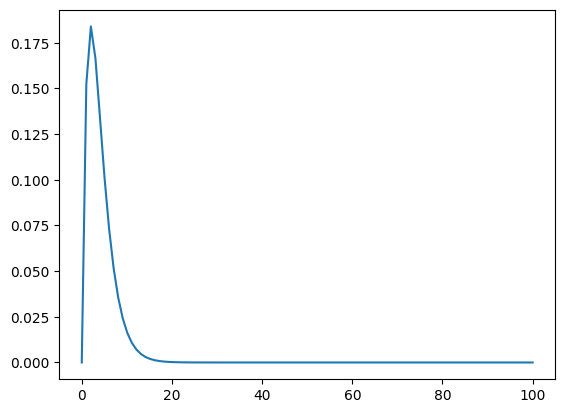

In [102]:
x = np.linspace(0, 100, 100)
y = chi2.pdf(x, df = 4)
plt.plot(x, y)

In [103]:
obsr = pd.crosstab(df2.Specialization,df2.Gender)
obsr

Gender,Female,Male
Specialization,,
computer application,18,45
computer engineering,62,126
computer science & engineering,82,209
electrical engineering,9,20
electronics & telecommunications,15,32
electronics and communication engineering,86,277
electronics and electrical engineering,16,52
information technology,65,169
mechanical engineering,5,68


#### Computing Chi2 statistics, p_value and dof

In [104]:
chi2_statistic, chi2_p_value, chi2_dof, chi2_expected = chi2_contingency(obsr)

print("Statistic            :", chi2_statistic)
print('')
print("p value              :", chi2_p_value)
print('')
print("Degrees of freedom   :", chi2_dof)
print('')
print("Expected frequencies array:\n", chi2_expected)

Statistic            : 23.657034842965704

p value              : 0.004877766327193452

Degrees of freedom   : 9

Expected frequencies array:
 [[ 16.41395992  46.58604008]
 [ 48.9813407  139.0186593 ]
 [ 75.81686247 215.18313753]
 [  7.55563234  21.44436766]
 [ 12.24533518  34.75466482]
 [ 94.57567381 268.42432619]
 [ 17.71665515  50.28334485]
 [ 60.96613683 173.03386317]
 [ 19.01935038  53.98064962]
 [ 23.70905321  67.29094679]]


#### Calculating chi2_critical

In [105]:
confidence_level = 0.95
alpha = 1 - confidence_level

chi2_critical = chi2.ppf(1 - alpha, chi2_dof)

chi2_critical

16.918977604620448

#### Chi-squared Test Visualization

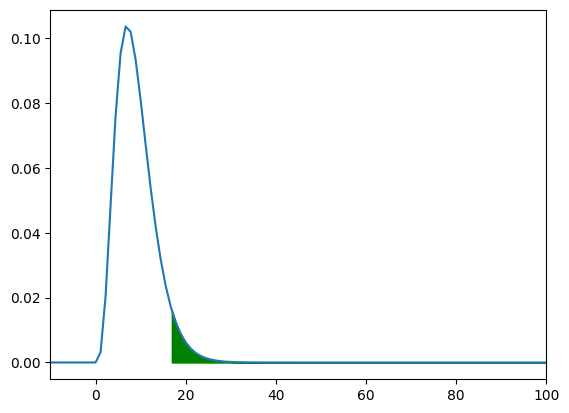

In [106]:
x_min = -10
x_max = 100

x = np.linspace(x_min, x_max, 100)
y = chi2.pdf(x, chi2_dof)
plt.xlim(x_min, x_max)
plt.plot(x, y)

chi2_critical_right = chi2_critical

x1 = np.linspace(chi2_critical_right, x_max, 100)
y1 = chi2.pdf(x1, chi2_dof)
plt.fill_between(x1, y1, color='green')

In [107]:
if(chi2_statistic > chi2_critical):
   print("There is not enough evidence to reject the Null Hypothesis")
else:
    print("There is sufficent evidence to reject the Null Hypothesis")

There is not enough evidence to reject the Null Hypothesis


In [108]:
if(chi2_p_value < alpha):
    print("There is not enough evidence to reject the Null Hypothesis")
else:
    print("There is sufficent evidence to reject the Null Hypothesis")

There is not enough evidence to reject the Null Hypothesis


#### Observations

| Test | Value |
| -- | -- |
| chi2_critical | 16.918977604620448 |
| chi2_statistic | 48.62141720904882 |
| chi2_p_value | 1.9542895953348e-07 |

- As the result of the second research question we see that there is a relationship between Gender and specialization.
- We test this claim through Chi-Square test and find the result that both the categorical variables are dependent on each other.
- Some specialization or working field does not allow some candidates to work in that field due to some risks.

## Conclusion

1. **Data Understanding:**

    - The dataset encompasses the employment outcomes of engineering graduates, focusing on target variable *Salary*.
    - Additionally, it includes standardized scores in three distinct areas: *cognitive skills, technical skills, and personality skills.*

2. **Data Manipulation:**

    - Upon initial observation, the dataset consists of 4000 rows and 40 columns.
    - The dataset exhibits numerous duplicate values, necessitating data manipulation.
    - Initially, we remove redundant rows and columns.
    - Subsequently, we assess for the presence of any missing values (NaN).
    - Following data cleaning, we proceed with visualization.

3. **Data Visualization:**

    - **Univariate Analysis:**

        - Univariate analysis encompasses various plots, including Cumulativee Distribution Functions (CDF), Histograms, Box Plots, and Summary Plots.
        - These visualizations illustrate probability and frequency distributions.

    - **Bivariate Analysis:**
        
        - Bivariate analysis comprises Scatterplots, Barplots, Crosstabs, Pivot tables, pie charts.
        - This analysis helps in comparing percentages across different variables.
        - Additionally, it aids in identifying outliers, as observed through Boxplots.
        - For instance, Countplots assist in identifying outliers within categorical variables, such as Job City, by highlighting the cities with higher employee counts.

## Making a Research Question

 ### "How do the personality traits of engineering graduates correlate with their job titles and salaries?"

C:\Users\KIRAN\AppData\Local\Temp\ipykernel_17960\4021968985.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ameo_subset.dropna(inplace=True)


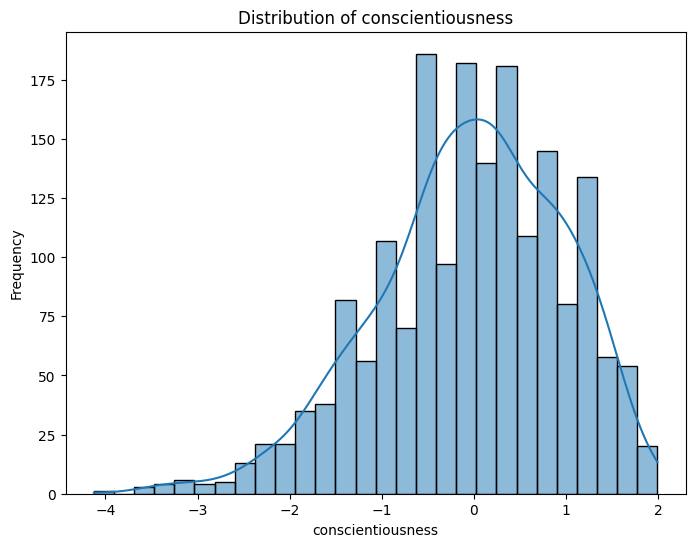

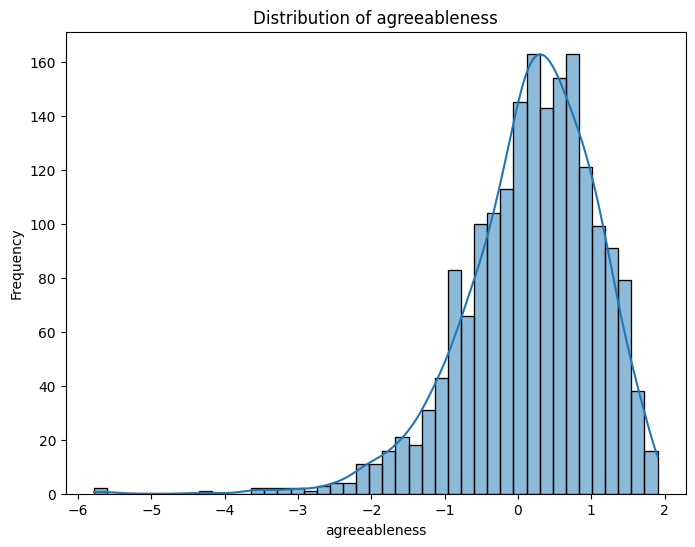

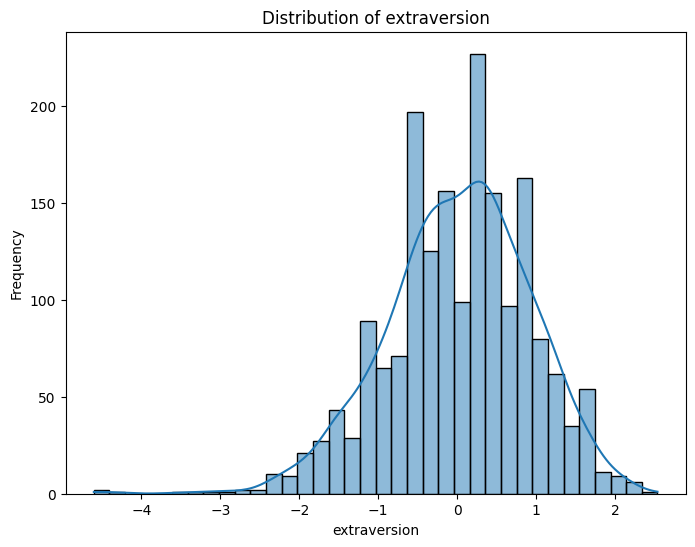

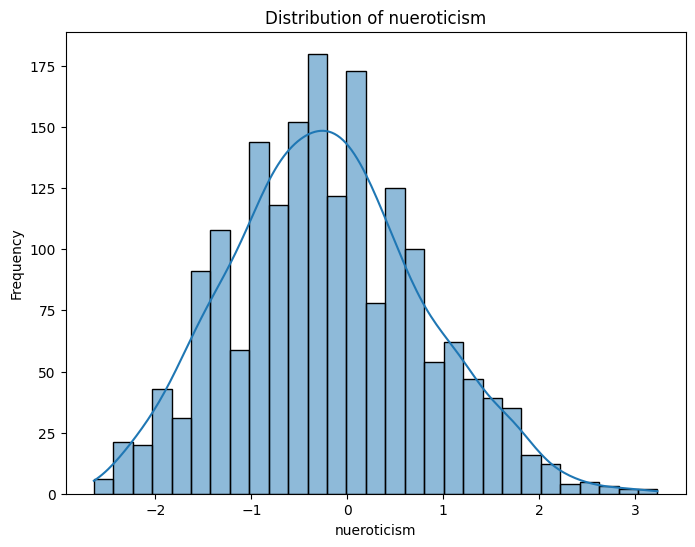

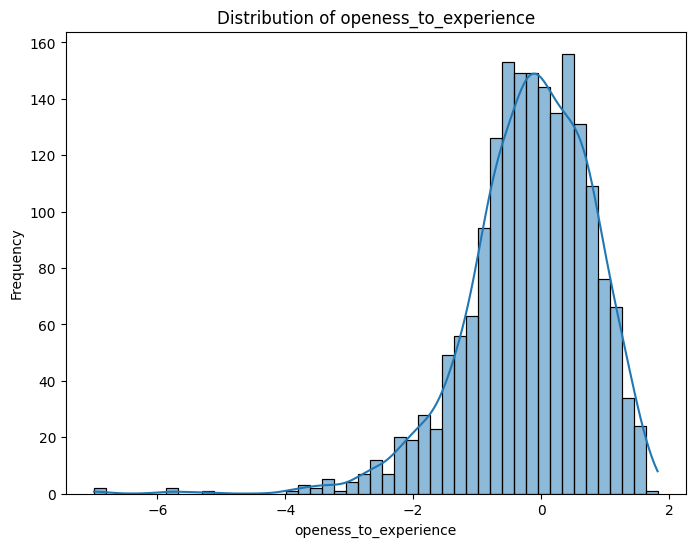

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     6.950
Date:                Fri, 23 Feb 2024   Prob (F-statistic):           1.93e-06
Time:                        07:54:13   Log-Likelihood:                -25058.
No. Observations:                1852   AIC:                         5.013e+04
Df Residuals:                    1846   BIC:                         5.016e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3.363e+

In [113]:
# Select relevant columns
relevant_columns = ['Designation', 'Salary', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']
ameo_subset = df1[relevant_columns]

# Drop rows with missing values
ameo_subset.dropna(inplace=True)

# Explore the distribution of personality traits
personality_traits = ['conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']
for trait in personality_traits:
    plt.figure(figsize=(8, 6))
    sns.histplot(ameo_subset[trait], kde=True)
    plt.title(f'Distribution of {trait}')
    plt.xlabel(trait)
    plt.ylabel('Frequency')
    plt.show()

# Regression analysis
X = ameo_subset[personality_traits]
X = sm.add_constant(X)
y = ameo_subset['Salary']
model = sm.OLS(y, X).fit()
print(model.summary())

### observation

Correlation Between Personality Traits and Salary: The regression analysis provides insights into the relationship between personality traits and salary. For instance, positive coefficients for certain personality traits may indicate that higher levels of those traits are associated with higher salaries, while negative coefficients may suggest the opposite.
Significant coefficients in the regression model suggest that certain personality traits may have a statistically significant impact on salary levels among engineering graduates.


Correlation Between Personality Traits and Job Titles:While the provided code snippet does not directly analyze the relationship between personality traits and job titles, further analysis could involve examining the distribution of personality traits across different job titles.
Observations from such analysis may reveal whether certain personality traits are more prevalent among individuals holding specific job titles.

Limitations and Considerations:
It's important to note that correlation does not imply causation. While significant correlations may exist between personality traits and career outcomes, other factors not accounted for in the analysis could also influence these outcomes.
The analysis may be limited by the quality and completeness of the dataset. Missing data or biases in the dataset could impact the validity of the findings.
The interpretation of the results should be done cautiously, considering the complexity of human behavior and the multitude of factors that contribute to career success.

### Observations

AMEO should consider revising its minimum percentage requirement or implementing additional screening processes to improve the quality of recruited candidates.